In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('headbrain.csv')

In [4]:
data.shape

(237, 4)

In [5]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [9]:
mean_x = np.mean(X)
mean_y = np.mean(y)

In [10]:
numer = 0
denom = 0

for i in range(len(X)):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

slope = numer/denom
intercept = mean_y - slope * mean_x

In [11]:
slope, intercept

(0.26342933948939945, 325.57342104944223)

In [12]:
from scipy.stats import linregress

In [13]:
linregress(X,y)

LinregressResult(slope=0.2634293394893994, intercept=325.57342104944235, rvalue=0.7995697092542962, pvalue=5.957630839406541e-54, stderr=0.012907433440886988)

In [14]:
predictions = []
for i  in range(len(X)):
    y_pred = X[i] * slope + intercept
    predictions.append(y_pred)


In [15]:
predictions[:10]

[1514.1666008256125,
 1310.2722920608173,
 1448.0458366137732,
 1320.546036300904,
 1425.9177720966638,
 1269.9676031189392,
 1322.6534710168191,
 1263.118440292215,
 1277.3436246246424,
 1374.549050896231]

In [16]:
y[:10]

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375],
      dtype=int64)

In [17]:
err = 0
for i in range(len(y)):
    err += (predictions[i] - y[i]) ** 2

mse = err / len(y)

In [18]:
print("Mean Squared Error",mse)

Mean Squared Error 5201.38402800233


In [19]:
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

Root mean squared error 72.1206213783709


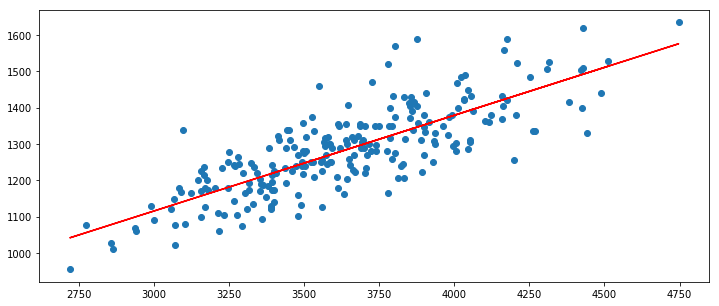

In [23]:
plt.figure(figsize=(12,5))
plt.scatter(X,y)
plt.plot(X,predictions,'red')

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [58]:
X[:10]

array([[ 2.40886829],
       [ 0.28535333],
       [ 1.72023489],
       [ 0.39235214],
       [ 1.4897759 ],
       [-0.13441126],
       [ 0.41430062],
       [-0.2057438 ],
       [-0.05759159],
       [ 0.95478182]])

In [81]:
epochs = 100000
alpha = 0.00003
errors = []
n = len(X)
def gradient(epoch,alpha,X,y):
    slope = 0
    intercept = 0
    for epoch in range(epochs):
        y_pred = X * slope + intercept
        error = y_pred - y
        errors.append(error)
        grad_intercept = (2/n) * np.sum(error)
        intercept = intercept - alpha * grad_intercept
        grad_slope = (2/n) * np.sum(error * X)
        slope = slope - alpha * grad_slope
    return slope,intercept

In [82]:
slope, intercept = gradient(epochs,alpha,X,y)

In [91]:
y_prediction = X * slope + intercept

In [84]:
y_prediction[:10]

array([[ 1.92128476],
       [ 0.22759443],
       [ 1.37203893],
       [ 0.31293541],
       [ 1.18822758],
       [-0.10720482],
       [ 0.33044126],
       [-0.16409881],
       [-0.04593437],
       [ 0.76152265]])

In [89]:
y_prediction = sc.inverse_transform(y_prediction)

In [86]:
y_prediction[:10]

array([[1513.59338554],
       [1310.20438927],
       [1447.63648881],
       [1320.45267202],
       [1425.56326441],
       [1269.99958768],
       [1322.55488387],
       [1263.16739917],
       [1277.35732914],
       [1374.32185062]])

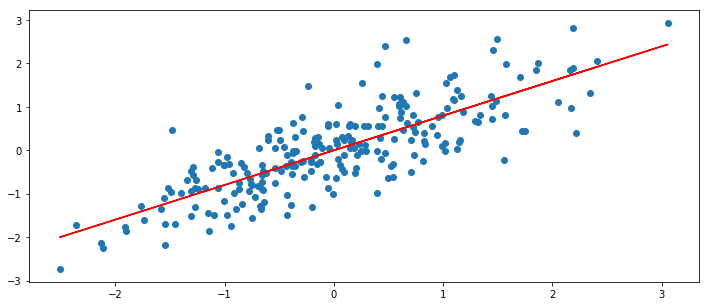

In [92]:
plt.figure(figsize=(12,5))
plt.scatter(X,y)
plt.plot(X,y_prediction,'red')

In [93]:
slope, intercept

(0.797588130827577, -3.157525998751709e-16)